# Facebook's Prophet Library for Time Series Prediction

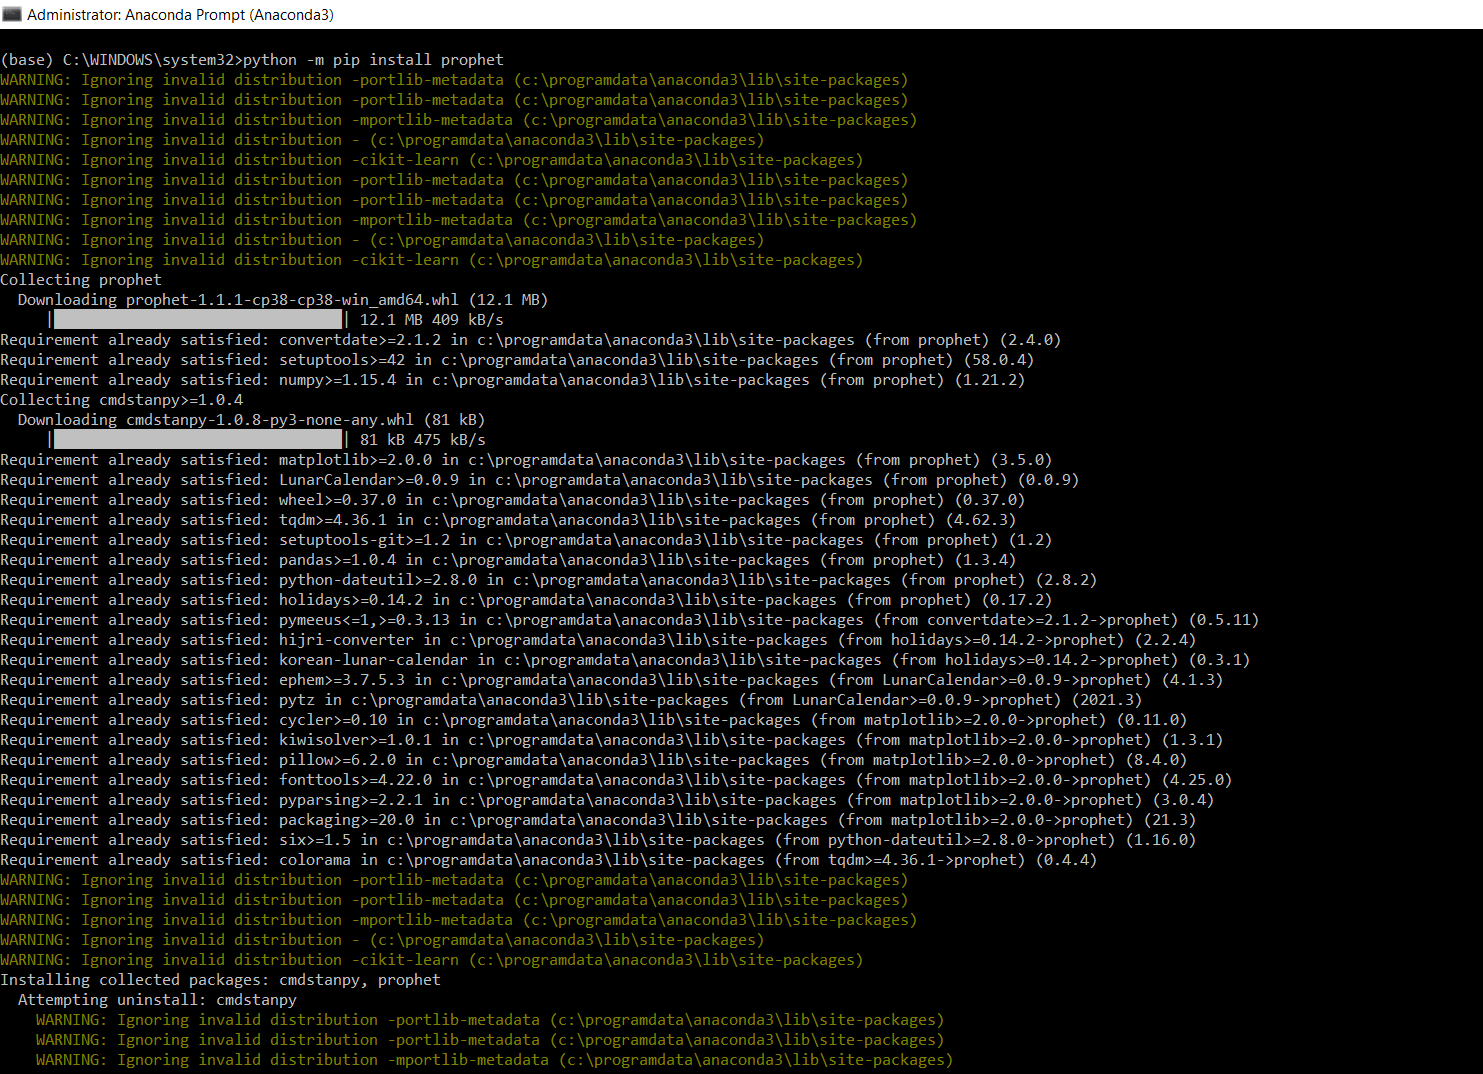

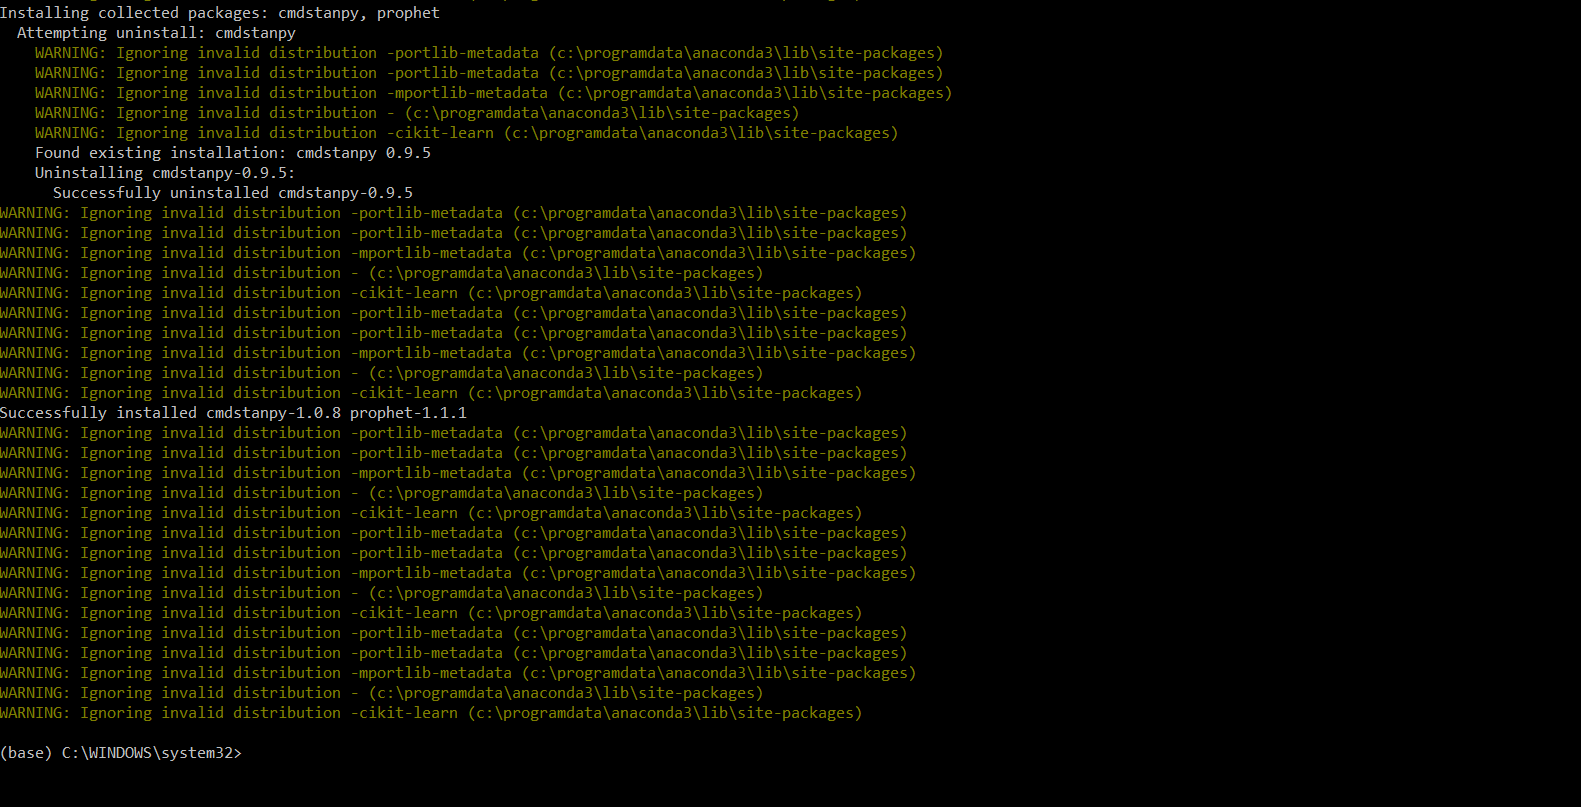

In [9]:
from prophet import Prophet

In [8]:
!pip install plotly --user


  Using cached tenacity-8.1.0-py3-none-any.whl (23 kB)


In [10]:
import numpy as np
import pandas as pd

In [11]:
df= pd.read_csv("BeerWineLiquor.csv")

In [12]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


### Formatting Data as Per need of Prophet Library:

In [13]:
df.columns = ["ds", "y"]

In [14]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [15]:
df["ds"] = pd.to_datetime(df["ds"])

In [16]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


### Creating and Fitting Prophet Model:

In [17]:
model = Prophet()

In [18]:
model.fit(df)

01:58:08 - cmdstanpy - INFO - Chain [1] start processing
01:58:08 - cmdstanpy - INFO - Chain [1] done processing


### Forecasting:

In [19]:
# Create Future Data Frame to Hold Forecasting Values:

future_df = model.make_future_dataframe(periods= 24, freq= "MS")

In [20]:
future_df.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [21]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [22]:
future_df.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [23]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


### Predict and Fill Values in Future DataFrame:

In [24]:
forecast = model.predict(future_df)

In [25]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1775.924150,1156.875296,1482.873056,1775.924150,1775.924150,-461.772065,-461.772065,-461.772065,-461.772065,-461.772065,-461.772065,0.0,0.0,0.0,1314.152085
1,1992-02-01,1778.672038,1186.053873,1513.867992,1778.672038,1778.672038,-426.071834,-426.071834,-426.071834,-426.071834,-426.071834,-426.071834,0.0,0.0,0.0,1352.600204
2,1992-03-01,1781.242643,1441.308679,1767.626695,1781.242643,1781.242643,-178.116295,-178.116295,-178.116295,-178.116295,-178.116295,-178.116295,0.0,0.0,0.0,1603.126348
3,1992-04-01,1783.990531,1425.939100,1740.512983,1783.990531,1783.990531,-196.084627,-196.084627,-196.084627,-196.084627,-196.084627,-196.084627,0.0,0.0,0.0,1587.905904
4,1992-05-01,1786.649778,1674.049758,1990.057159,1786.649778,1786.649778,44.517727,44.517727,44.517727,44.517727,44.517727,44.517727,0.0,0.0,0.0,1831.167505


In [26]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5202.435967,5076.813232,5395.341389,5189.551053,5212.464538,38.953794,38.953794,38.953794,38.953794,38.953794,38.953794,0.0,0.0,0.0,5241.389761
344,2020-09-01,5218.524536,4925.584267,5258.145200,5204.510260,5229.450760,-134.401102,-134.401102,-134.401102,-134.401102,-134.401102,-134.401102,0.0,0.0,0.0,5084.123434
345,2020-10-01,5234.094119,5021.041622,5353.142388,5218.617058,5246.072375,-43.336212,-43.336212,-43.336212,-43.336212,-43.336212,-43.336212,0.0,0.0,0.0,5190.757907
346,2020-11-01,5250.182689,5183.425401,5498.917461,5233.239179,5263.175243,88.966699,88.966699,88.966699,88.966699,88.966699,88.966699,0.0,0.0,0.0,5339.149388
347,2020-12-01,5265.752272,6170.622188,6488.866178,5247.652684,5279.760844,1069.092290,1069.092290,1069.092290,1069.092290,1069.092290,1069.092290,0.0,0.0,0.0,6334.844562


### Plotting Forecast:

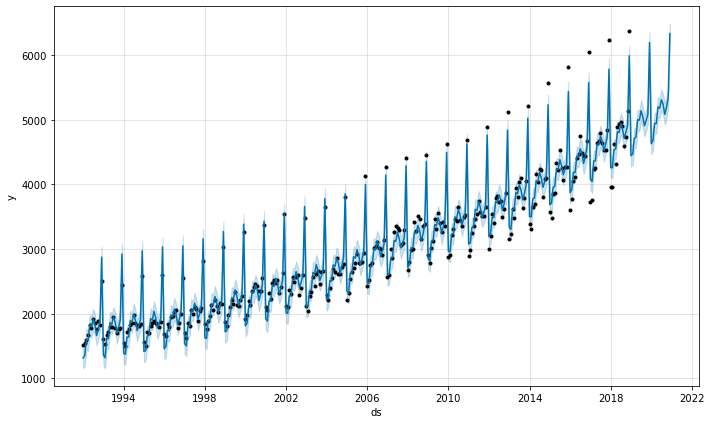

In [28]:
model.plot(forecast);

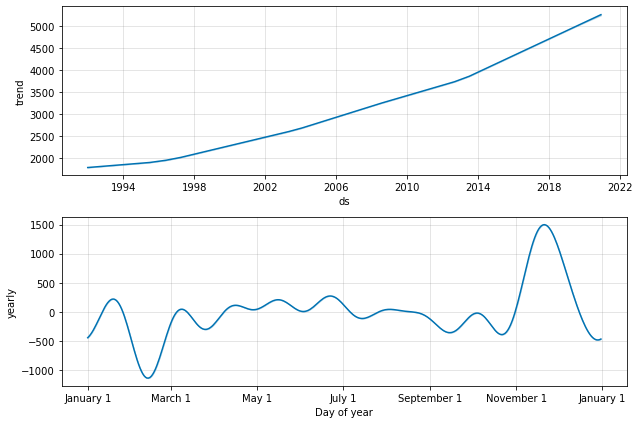

In [31]:
model.plot_components(forecast);